In [265]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# load dataset
pima = pd.read_csv("speedDating_trab.csv")

pima


,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1.0,1,21.0,27.0,2.0,7.0,1.0,0.14,2.0,1.0,7.0,6.0,0
1,2,1.0,2,21.0,22.0,2.0,7.0,1.0,0.54,2.0,1.0,7.0,5.0,0
2,3,1.0,3,21.0,22.0,2.0,7.0,1.0,0.16,2.0,1.0,7.0,NaN,1
3,4,1.0,4,21.0,23.0,2.0,7.0,1.0,0.61,2.0,1.0,7.0,6.0,1
4,5,1.0,5,21.0,24.0,2.0,7.0,1.0,0.21,2.0,1.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,22.0,18,25.0,26.0,1.0,2.0,1.0,0.64,1.0,0.0,2.0,5.0,0
8374,8375,22.0,19,25.0,24.0,1.0,2.0,1.0,0.71,1.0,0.0,4.0,4.0,0
8375,8376,22.0,20,25.0,29.0,1.0,2.0,1.0,-0.46,1.0,0.0,6.0,5.0,0
8376,8377,22.0,21,25.0,22.0,1.0,2.0,1.0,0.62,1.0,0.0,5.0,5.0,0


In [266]:
pima.isnull().sum()


Unnamed: 0      0
id              1
partner         0
age            95
age_o         104
goal           79
date           97
go_out         79
int_corr      158
length        915
met           375
like          240
prob          309
match           0
dtype: int64

In [267]:
#estratégia de fill todos os NAN
pima=pima.fillna(0)

In [268]:
#convertemos de float para int
pima[['prob','like','met','length','go_out','date','goal','age_o','age','id']]=  pima[['prob','like','met','length','go_out','date','goal','age_o','age','id']].astype(int)

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8378 non-null   int64  
 1   id          8378 non-null   int64  
 2   partner     8378 non-null   int64  
 3   age         8378 non-null   int64  
 4   age_o       8378 non-null   int64  
 5   goal        8378 non-null   int64  
 6   date        8378 non-null   int64  
 7   go_out      8378 non-null   int64  
 8   int_corr    8378 non-null   float64
 9   length      8378 non-null   int64  
 10  met         8378 non-null   int64  
 11  like        8378 non-null   int64  
 12  prob        8378 non-null   int64  
 13  match       8378 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 916.5 KB


In [269]:
#numero de 1's
print("% 1's:",pima['match'].mean())
print("% 0's:", 1-pima['match'].mean())


% 1's: 0.16471711625686322
% 0's: 0.8352828837431368


In [270]:
pima.isnull().sum()


Unnamed: 0    0
id            0
partner       0
age           0
age_o         0
goal          0
date          0
go_out        0
int_corr      0
length        0
met           0
like          0
prob          0
match         0
dtype: int64

In [271]:
pima.head(10)


,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1,1,21,27,2,7,1,0.14,2,1,7,6,0
1,2,1,2,21,22,2,7,1,0.54,2,1,7,5,0
2,3,1,3,21,22,2,7,1,0.16,2,1,7,0,1
3,4,1,4,21,23,2,7,1,0.61,2,1,7,6,1
4,5,1,5,21,24,2,7,1,0.21,2,1,6,6,1
5,6,1,6,21,25,2,7,1,0.25,2,1,6,5,0
6,7,1,7,21,30,2,7,1,0.34,2,1,6,5,0
7,8,1,8,21,27,2,7,1,0.50,2,0,6,7,0
8,9,1,9,21,28,2,7,1,0.28,2,1,7,7,1
9,10,1,10,21,24,2,7,1,-0.36,2,1,6,6,0


In [272]:
pima = pima.drop('int_corr',1)

#divisao do casos em q tem match e os q n tem match
resultados = pima['match']
dados = pima.drop(['match'],axis=1)


# Split dataset into training set and test set (30%/70%)
dados_treino, dados_teste, resultados_treino, resultados_teste= train_test_split( dados, resultados, test_size=0.3,random_state=1)

In [273]:
#ID3 COM ENTROPIA
#METODO HOLDOUT
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(dados_treino, resultados_treino)

#Predict the response for test dataset
predicted_test = clf.predict(dados_teste)

In [274]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted_test))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, clf.predict(dados_teste)))

print(classification_report(resultados_teste, clf.predict(dados_teste)))


Accuracy: 0.7915672235481305
Matriz de confusão:
 [[1828  279]
 [ 245  162]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2107
           1       0.37      0.40      0.38       407

    accuracy                           0.79      2514
   macro avg       0.62      0.63      0.63      2514
weighted avg       0.80      0.79      0.79      2514



In [275]:
#METODO VALIDAÇÃO CRUZADA (CROSS-VALIDATION)
kf = KFold(n_splits=7,shuffle=False)
kf.split(dados)

scores=cross_val_score(DecisionTreeClassifier(), dados, resultados, cv=14, scoring='accuracy')
print("Cross Validation:", scores)
print("The mean value for K-fold cross validation test that best explains our model is {}".format(scores.mean()),"\n")

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")

# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(dados):
    # Train test split
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # Train the model
    model = clf.fit(dados_treino, resultados_treino)
    # Calculate the confusion matrix
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score)
    
    c = score
    # Add the score to the previous confusion matrix of previous model
    array = array+c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation: [0.74958264 0.70116861 0.65609349 0.60934891 0.66444073 0.76293823
 0.7541806  0.73076923 0.72742475 0.75752508 0.7458194  0.68227425
 0.70234114 0.77591973]
The mean value for K-fold cross validation test that best explains our model is 0.7157019144026474 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[776 236]
 [114  71]]
[[845 111]
 [186  55]]
[[833 168]
 [146  50]]
[[879 153]
 [118  47]]
[[788 198]
 [125  86]]
[[804 193]
 [138  62]]
[[855 159]
 [106  76]]

 SOA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[5780 1218]
 [ 933  447]] 



In [276]:
#NAIVE BAYES

#METODO HOLDOUT

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(dados_treino,resultados_treino)

#Predict the response for test dataset
predicted3 = gnb.predict(dados_teste)
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted3))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, gnb.predict(dados_teste)))

print(classification_report(resultados_teste,gnb.predict(dados_teste)))


Accuracy: 0.846989966555184
Matriz de confusão:
 [[989  25]
 [158  24]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1014
           1       0.49      0.13      0.21       182

    accuracy                           0.85      1196
   macro avg       0.68      0.55      0.56      1196
weighted avg       0.81      0.85      0.81      1196



In [277]:
#METODO VALIDAÇÃO CRUZADA (CROSS-VALIDATION)

kf = KFold(n_splits=7,shuffle=False)
kf.split(dados)

scores=cross_val_score(GaussianNB(), dados, resultados, cv=10, scoring='accuracy')
print("Cross Validation:", scores)
print("The mean value for K-fold cross validation test that best explains our model is {}".format(scores.mean()),"\n")

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(dados):
    # Train test split
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # Train the model
    model = gnb.fit(dados_treino, resultados_treino)
    # Calculate the confusion matrix
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # Add the score to the previous confusion matrix of previous model
    array = array + c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation: [0.79116945 0.81384248 0.8424821  0.78042959 0.83770883 0.81145585
 0.849642   0.79355609 0.81003584 0.84468339]
The mean value for K-fold cross validation test that best explains our model is 0.8175005631545782 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[862 150]
 [103  82]]
[[911  45]
 [169  72]]
[[879 122]
 [137  59]]
[[986  46]
 [142  23]]
[[964  22]
 [167  44]]
[[902  95]
 [144  56]]
[[989  25]
 [158  24]]

 SOA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[6493  505]
 [1020  360]] 



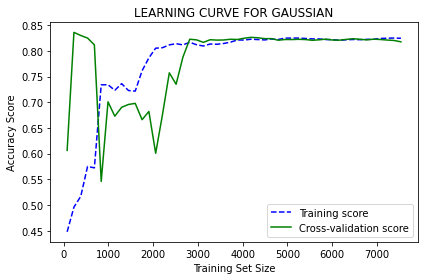

In [278]:
#PRINT LEARNING CURVE
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(GaussianNB(), dados, resultados, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR GAUSSIAN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()